In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, MaxPooling2D, Flatten
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import numpy as np
import pickle

In [2]:
DATADIR = "datasets/catdog/PetImages"
CATEGORIES = ['Dog', 'Cat']

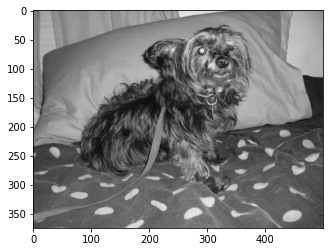

In [3]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [5]:
print(img_array.shape)

(375, 500)


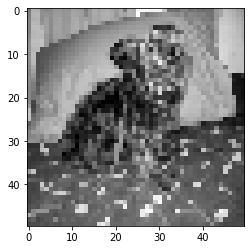

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

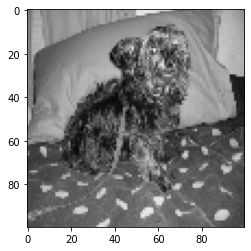

In [7]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [00:11<00:00, 1079.72it/s]

24946


In [9]:
print(training_data[:2][1])

[array([[151, 120, 127, ...,  92, 112,  89],
       [128,  92,  87, ...,  84,  98,  82],
       [118,  76,  92, ...,  82,  93,  76],
       ...,
       [252, 247, 247, ..., 225, 230, 232],
       [249, 239, 240, ..., 232, 235, 231],
       [251, 242, 241, ..., 241, 239, 238]], dtype=uint8), 0]


In [10]:
random.shuffle(training_data)

In [11]:
print(training_data[:2][1])

[array([[ 97,  94,  98, ...,  78,  74,  71],
       [101,  91,  92, ...,  70,  59,  68],
       [101,  94,  99, ...,  77,  81,  79],
       ...,
       [100,  87,  66, ...,  56,  64,  66],
       [ 55,  69,  47, ...,  60,  24,  55],
       [ 90,  83,  75, ...,  81, 102,  73]], dtype=uint8), 0]


In [12]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
1
1
1
1
1


In [13]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 24]
   [ 19]
   [ 20]
   ...
   [ 36]
   [ 36]
   [ 36]]

  [[ 16]
   [ 18]
   [ 20]
   ...
   [ 31]
   [ 30]
   [ 31]]

  [[ 23]
   [ 18]
   [ 22]
   ...
   [ 30]
   [ 28]
   [ 31]]

  ...

  [[ 56]
   [ 61]
   [ 53]
   ...
   [119]
   [117]
   [114]]

  [[ 53]
   [ 45]
   [ 60]
   ...
   [112]
   [113]
   [106]]

  [[ 49]
   [ 50]
   [ 61]
   ...
   [113]
   [112]
   [110]]]]


In [14]:
pickle_out = open(f"{DATADIR}/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(f"{DATADIR}/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open(f"{DATADIR}/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open(f"{DATADIR}/y.pickle","rb")
y = pickle.load(pickle_in)

In [21]:
X[:1]

array([[[[0.09411765],
         [0.0745098 ],
         [0.07843137],
         ...,
         [0.14117647],
         [0.14117647],
         [0.14117647]],

        [[0.0627451 ],
         [0.07058824],
         [0.07843137],
         ...,
         [0.12156863],
         [0.11764706],
         [0.12156863]],

        [[0.09019608],
         [0.07058824],
         [0.08627451],
         ...,
         [0.11764706],
         [0.10980392],
         [0.12156863]],

        ...,

        [[0.21960784],
         [0.23921569],
         [0.20784314],
         ...,
         [0.46666667],
         [0.45882353],
         [0.44705882]],

        [[0.20784314],
         [0.17647059],
         [0.23529412],
         ...,
         [0.43921569],
         [0.44313725],
         [0.41568627]],

        [[0.19215686],
         [0.19607843],
         [0.23921569],
         ...,
         [0.44313725],
         [0.43921569],
         [0.43137255]]]])

In [24]:
y[:10]

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

In [29]:
X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X[:1000], np.array(y)[:1000], batch_size=1, epochs=3, validation_split=0.3)

Epoch 1/3
700/700 [==============================] - 66s 93ms/step - loss: 0.7192 - accuracy: 0.5214 - val_loss: 0.6982 - val_accuracy: 0.4667
Epoch 2/3
700/700 [==============================] - 67s 95ms/step - loss: 0.6943 - accuracy: 0.5114 - val_loss: 0.6954 - val_accuracy: 0.4667
Epoch 3/3
700/700 [==============================] - 65s 93ms/step - loss: 0.6941 - accuracy: 0.5171 - val_loss: 0.6963 - val_accuracy: 0.4667


In [31]:
X[1001]

array([[[6.18312233e-14],
        [4.72827002e-14],
        [3.63713078e-14],
        ...,
        [5.31021094e-13],
        [4.36455694e-13],
        [4.36455694e-13]],

       [[6.54683541e-14],
        [5.45569617e-14],
        [5.45569617e-14],
        ...,
        [5.34658225e-13],
        [4.00084386e-13],
        [4.91012655e-13]],

       [[4.72827002e-14],
        [4.36455694e-14],
        [3.63713078e-14],
        ...,
        [5.23746833e-13],
        [4.00084386e-13],
        [5.05561179e-13]],

       ...,

       [[3.63713078e-15],
        [3.63713078e-15],
        [3.63713078e-15],
        ...,
        [4.40092825e-13],
        [4.29181432e-13],
        [3.74624470e-13]],

       [[3.63713078e-15],
        [3.63713078e-15],
        [3.63713078e-15],
        ...,
        [4.43729955e-13],
        [4.14632909e-13],
        [4.25544301e-13]],

       [[3.63713078e-15],
        [3.63713078e-15],
        [3.63713078e-15],
        ...,
        [3.89172994e-13],
        [3.5643

In [38]:
pred = model.predict(X[1000:1001])
class_index = np.argmax(pred)

In [39]:
class_index

0

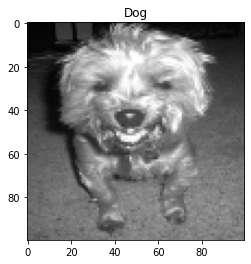

In [45]:
plt.imshow(training_data[1000][0], cmap='gray')
plt.title(CATEGORIES[class_index])
plt.show()